## Programming for Data Analysis - Project 2021
---
Jody Bradley (G00387878@gmit.ie)

### Assignment
- Create a data set by simulating a real-world phenomeon, modeled and synthesised using Python. 
- Choose a real world phenomenon that can be measured and for which at least 100 data points can be collected over at least four different variables.
- Investigate the types of variables involved, their likely distributions and their relationships with each other.
- Synthesis / simulate a data set as closely matching their properties as possible. 
- Detail your research and implement the simulation in a Jupyter notebook - the data itself can simply be displated in an output cell within the notebook.

### Introduction




### Generating synthetic data with Scikit-Learn

https://python-course.eu/machine-learning/artificial-datasets-with-scikit-learn.php



In [1]:
import numpy as np
import pandas as pd


cities = ['Berlin', 'Frankfurt', 'Hamburg', 
          'Nuremberg', 'Munich', 'Stuttgart',
          'Hanover', 'Saarbruecken', 'Cologne',
          'Constance', 'Freiburg', 'Karlsruhe'
         ]

n= len(cities)
data = {'Temperature': np.random.normal(24, 3, n),
        'Humidity': np.random.normal(78, 2.5, n),
        'Wind': np.random.normal(15, 4, n)
       }
df = pd.DataFrame(data=data, index=cities)
df

,Temperature,Humidity,Wind
Berlin,25.962729,81.192579,13.358747
Frankfurt,25.698308,74.351624,8.937375
Hamburg,23.492934,76.383933,10.567897
Nuremberg,26.134597,75.613609,17.855758
Munich,22.248426,73.150805,16.366727
Stuttgart,24.683934,78.153862,12.901993
Hanover,24.797898,78.013341,18.606834
Saarbruecken,26.920212,76.553133,21.752957
Cologne,26.842554,80.887242,15.108993
Constance,22.592282,74.760762,8.064434


### The dataset
https://archive.ics.uci.edu/ml/datasets/Student+Performance

I have taken a data set sourced from the UCI Machine Learning Repository as compiled by Prof Paulo Cortez of the Department of Information Systems, School of Engineering, University of Minho, Portugal.

While the original data set has 32 attributes, for the purpose of this assignment I am focusing on the correlation between alcohol consumption and study time, absence days and the overall final grade of the student. On that basis, I have cleansed the data set, as follows:
* Sex - student's sex (binary: 'F' - female or 'M' - male)
* Age - student's age (numeric: from 15 to 22)
* Study time - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* Weekday Alcohol consumption -(numeric: from 1 - very low to 5 - very high)
* Weekend Alcohol consumption -(numeric: from 1 - very low to 5 - very high)
* Absence days - number of school absences (numeric: from 0 to 75)
* Final Grade - (numeric: from 0 to 20, output target)

The data set comprises 395 samples. 

In [2]:
# import pandas.
import pandas as pd

# load the students data set.
df = pd.read_csv('students2.csv')

# View data.
df

,sex,age,studytime,weekday alc,weekend alc,absences,Final Grade
0,F,18,2,1,1,6,6
1,F,17,2,1,1,4,6
2,F,15,2,2,3,10,10
3,F,15,3,1,1,2,15
4,F,16,2,1,2,4,10
...,...,...,...,...,...,...,...
390,M,20,2,4,5,11,9
391,M,17,1,3,4,3,16
392,M,21,1,3,3,3,7
393,M,18,1,3,4,0,10


In [3]:
# View a basic statistical overview of the dataset:
print(df.describe())

              age   studytime  weekday alc  weekend alc    absences  \
count  395.000000  395.000000   395.000000   395.000000  395.000000   
mean    16.696203    2.035443     1.481013     2.291139    5.708861   
std      1.276043    0.839240     0.890741     1.287897    8.003096   
min     15.000000    1.000000     1.000000     1.000000    0.000000   
25%     16.000000    1.000000     1.000000     1.000000    0.000000   
50%     17.000000    2.000000     1.000000     2.000000    4.000000   
75%     18.000000    2.000000     2.000000     3.000000    8.000000   
max     22.000000    4.000000     5.000000     5.000000   75.000000   

       Final Grade  
count   395.000000  
mean     10.415190  
std       4.581443  
min       0.000000  
25%       8.000000  
50%      11.000000  
75%      14.000000  
max      20.000000  


In [19]:
# Boolean Selects. Show all females
df[df.loc[:, 'sex'] == 'F']

,sex,age,studytime,weekday alc,weekend alc,absences,Final Grade
0,F,18,2,1,1,6,6
1,F,17,2,1,1,4,6
2,F,15,2,2,3,10,10
3,F,15,3,1,1,2,15
4,F,16,2,1,2,4,10
...,...,...,...,...,...,...,...
385,F,18,3,1,3,2,10
386,F,18,1,2,2,7,6
387,F,19,3,1,2,0,0
388,F,18,2,1,1,0,8


In [17]:
# We now know that we have 208 females in our sample meaning that we have 187 males.


C:\Users\jodyb\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


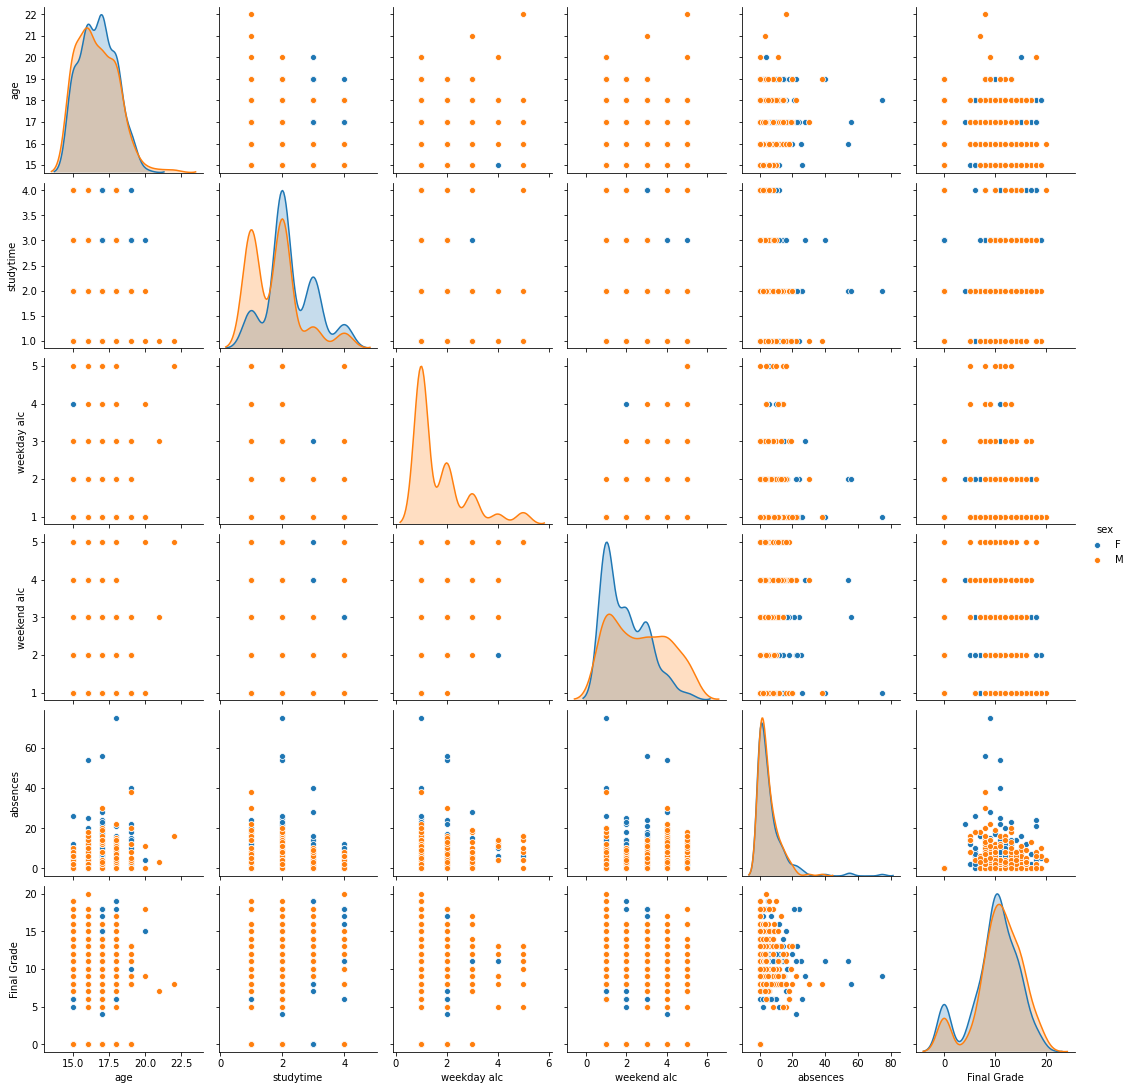

In [22]:
import seaborn as sns
sns.pairplot(df, hue='sex')

FileNotFoundError: [Errno 2] File ../input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv does not exist: '../input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv'

In [24]:
# import pandas.
import pandas as pd

# load the students data set.
penguins = pd.read_csv('penguins.csv')

# View data.
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [ ]:
sns.pairplot(df, hue='species')